In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# NOTE: Make sure that the class is labeled 'target' in the data file
test_val_data = pd.read_csv('~/Documents/MooreLab/test_validate_data.csv', sep=',', dtype=np.float64)
features = test_val_data.drop('phenotype', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, test_val_data['phenotype'].values, random_state=None)

# Average CV score on the training set was:0.5524240156174044
exported_pipeline = XGBClassifier(learning_rate=0.001, max_depth=10, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.7000000000000001)

exported_pipeline.fit(training_features, training_target)
print(exported_pipeline.score(testing_features, testing_target)) # The score of our ML pipeline on test data (features & target)

yhat_test = exported_pipeline.predict(testing_features)          # Predicts the phenotype for each member of test_val_data

#sum of absolute value of results vs testing_target divided by length of testing_target vector

0.5880398671096345


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
test_err = sum(abs(yhat_test - testing_target))/len(testing_target)

In [8]:
print(test_err)

0.43521594684385384


In [9]:
0.5647840531561462+0.43521594684385384

1.0

In [21]:
prob_test = exported_pipeline.predict_proba(testing_features)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


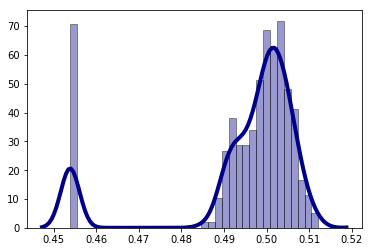

In [23]:
#visualize density plot of second columns (prob of having breast cancer ie phenotype = 1)
second_column = prob_test[:,1]
sns.distplot(second_column, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:

second_column = prob_test[:,1]

#then go to precision medicine dataset, grab ONE individual, 
# run pipeline i.e prob_test_of_one_patient_in_premeddataset = exported_pipeline.predict_proba(the one participant's 29 SNP)
# see where that patient falls in the density plot

# hopefully gives you probability gaussian distribution for training samples
exported_pipeline.predict_proba(X_train) ## does this return a distribution or a numerical probability?
# exported_pipeline.fit(X_train, y_train)

test_sub_1 = X_test[0,]
exported_pipeline.predict_proba(test_sub_1) # initial risk score

# modify test_sub_1 mutation rs1234
test_sub_1['rs1234']
test_sub_1['rs1234'] = 2
exported_pipeline.predict_proba(test_sub_1) # modified risk score

# How to systematically do this for all 29 mutations? For loop? Are we visualizing every time?
# Tentatively, change, call predict_proba, store in new array - but how are we systematically changing 0, 1, 2?
